In [6]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [7]:
file_path = "Dataset"

In [8]:
name_class = os.listdir(file_path)
name_class

['Urmila ',
 'Rajashri Dond_left',
 'krithi_left',
 'Kirti ',
 'Rajashri Dond',
 'Urmila_left']

In [9]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [10]:
filepaths

['Dataset/Urmila /20231218_121412.jpg',
 'Dataset/Urmila /20231217_193733.jpg',
 'Dataset/Urmila /20231217_185918.jpg',
 'Dataset/Urmila /20231217_193738.jpg',
 'Dataset/Urmila /20231217_185952.jpg',
 'Dataset/Urmila /20231217_200619.jpg',
 'Dataset/Urmila /20231217_185934.jpg',
 'Dataset/Urmila /20231218_104733(0).jpg',
 'Dataset/Urmila /20231218_104725.jpg',
 'Dataset/Urmila /20231217_201036.jpg',
 'Dataset/Urmila /20231218_104736.jpg',
 'Dataset/Urmila /20231217_193726.jpg',
 'Dataset/Urmila /20231218_115859.jpg',
 'Dataset/Urmila /20231218_121411.jpg',
 'Dataset/Urmila /20231217_201030(0).jpg',
 'Dataset/Urmila /20231218_115904.jpg',
 'Dataset/Urmila /20231218_115926.jpg',
 'Dataset/Urmila /20231217_185911.jpg',
 'Dataset/Urmila /20231217_193727.jpg',
 'Dataset/Urmila /20231218_104747.jpg',
 'Dataset/Urmila /20231217_185921.jpg',
 'Dataset/Urmila /20231217_193739.jpg',
 'Dataset/Urmila /20231218_104733.jpg',
 'Dataset/Urmila /20231218_120928.jpg',
 'Dataset/Urmila /20231218_120926.

In [11]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Urmila ',
 'Ur

In [12]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,Dataset/Kirti /IMG20231218142108.jpg,Kirti
1,Dataset/Rajashri Dond/IMG_20231218_142851.jpg,Rajashri Dond
2,Dataset/Urmila /20231217_200619.jpg,Urmila
3,Dataset/Urmila_left/20231217_133434.jpg,Urmila_left
4,Dataset/Urmila /20231217_193746.jpg,Urmila


In [13]:
#balancing

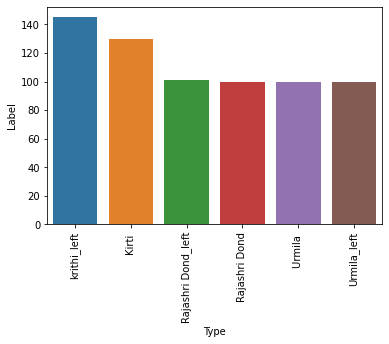

In [14]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [15]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [17]:
train, test = train_test_split(data, test_size=0.10, random_state=42)

In [18]:
test, val= train_test_split(test, test_size=0.50, random_state=42)

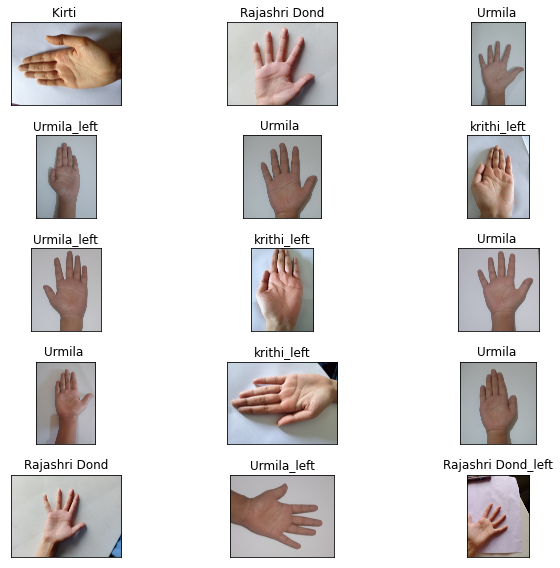

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [20]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 608 validated image filenames belonging to 6 classes.
Found 34 validated image filenames belonging to 6 classes.
Found 34 validated image filenames belonging to 6 classes.


In [22]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

2023-12-28 16:42:06.220770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-28 16:42:06.222016: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-28 16:42:06.223942: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2023-12-28 16:42:06.226437: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50
)

Epoch 1/50
19/19 [==============================] - 71s 4s/step - loss: 0.2839 - accuracy: 0.9013 - val_loss: 0.4744 - val_accuracy: 0.8529
Epoch 2/50
19/19 [==============================] - 66s 3s/step - loss: 0.1539 - accuracy: 0.9424 - val_loss: 0.2038 - val_accuracy: 0.9118
Epoch 3/50
19/19 [==============================] - 73s 4s/step - loss: 0.0648 - accuracy: 0.9819 - val_loss: 0.1492 - val_accuracy: 0.9706
Epoch 4/50
19/19 [==============================] - 70s 4s/step - loss: 0.0281 - accuracy: 0.9967 - val_loss: 0.1635 - val_accuracy: 0.9706
Epoch 5/50
19/19 [==============================] - 69s 4s/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9706
Epoch 6/50
19/19 [==============================] - 68s 4s/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9706
Epoch 7/50
19/19 [==============================] - 72s 4s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1370 - val_accuracy: 0.9706
Epoch 8/50
19/19 [==

In [29]:
model.save("model_palm_classification.h5")  

/home/admin1/.local/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


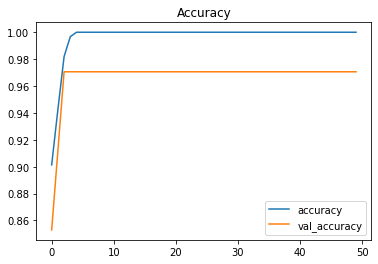

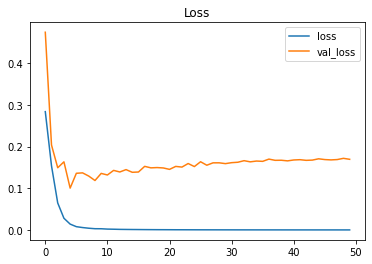

In [30]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [31]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.16951
Test Accuracy: 97.06%


In [32]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [33]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

            Kirti        1.00      1.00      1.00         5
     Rajashri Dond       1.00      0.86      0.92         7
Rajashri Dond_left       1.00      1.00      1.00         3
           Urmila        0.89      1.00      0.94         8
       Urmila_left       1.00      1.00      1.00         5
       krithi_left       1.00      1.00      1.00         6

          accuracy                           0.97        34
         macro avg       0.98      0.98      0.98        34
      weighted avg       0.97      0.97      0.97        34



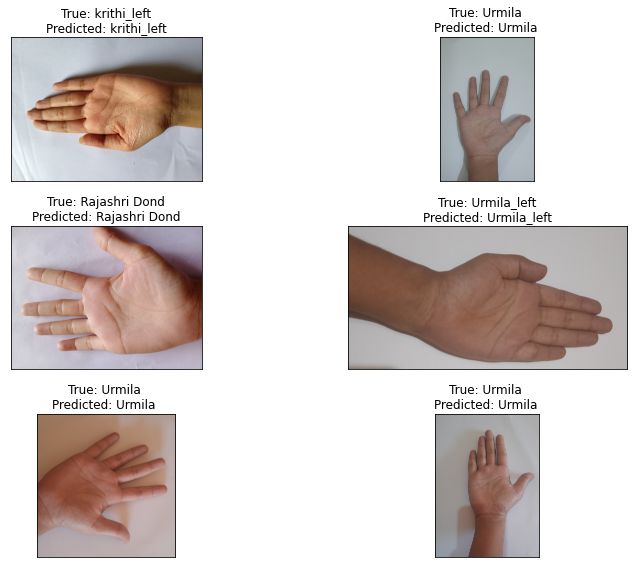

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [35]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_palm_classification.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions